In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kaggle_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2000, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


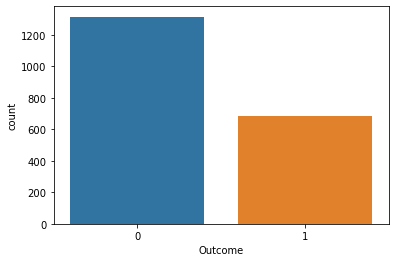

In [6]:
sns.countplot(df['Outcome'])

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
a= df ==0
a.sum().sum()

3277

In [9]:
print("Total Zero Values Are",a.sum().sum())

Total Zero Values Are 3277


In [10]:
df_copy = df.copy(deep=True)
#convert zero to nan
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
a = df_copy == 0
print("After Convert Zero values",a.sum().sum())

After Convert Zero values 1617


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   1987 non-null   float64
 2   BloodPressure             1910 non-null   float64
 3   SkinThickness             1427 non-null   float64
 4   Insulin                   1044 non-null   float64
 5   BMI                       1972 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [13]:
#total null value
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
#treat with null values
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin']=df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

In [15]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

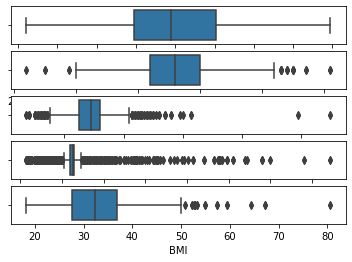

In [16]:
plt.subplot(511)
sns.boxplot(df_copy['Glucose'])

plt.subplot(512)
sns.boxplot(df_copy['BloodPressure'])

plt.subplot(513)
sns.boxplot(df_copy['SkinThickness'])

plt.subplot(514)
sns.boxplot(df_copy['Insulin'])

plt.subplot(515)
sns.boxplot(df_copy['BMI'])

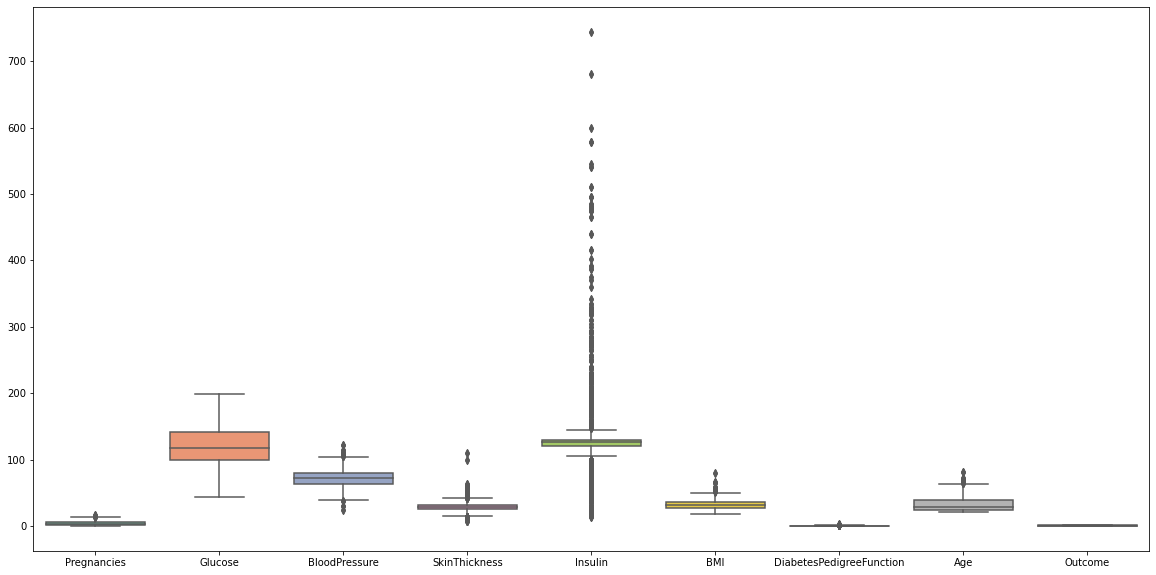

In [17]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_copy,palette="Set2")

In [18]:
X = df.drop("Outcome",axis=1)
y = df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 41)

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

E:\Users\azmina.vanzara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[245,  21],
       [ 59,  75]], dtype=int64)

In [23]:
lr.score(X_test,y_test)*100

80.0

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred_rfc = rfc.predict(X_test)

In [26]:
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
cm_rfc

array([[265,   1],
       [  2, 132]], dtype=int64)

In [27]:
rfc.score(X_test,y_test)*100

99.25

In [28]:
#result for Random Forest Classifier
result = rfc.predict([[0, #Pregnancies
                  84.0, #Glucose
                  82.000000, #BloodPressure
                  31.0, #SkinThickness 
                  125.0, #Insulin
                  38.2, #BMI
                  0.233, #DiabetesPedigreeFunction
                  23 #Age
                      ]])
result
#rfc give accurate

array([0], dtype=int64)